## Estimating R0 from the final size of an epidemic

The final proportion of a population infected and the basic reproductive number are related through the following equation:

<center>$ r(\infty) = 1 - e^{(- R_0 r(\infty))}$.  </center>


To solve for $R_0$ given a final size we can simply plug in the observed final size and rearrange the equation as shown below.

<center>$ R_0 = - \frac{ln(1-r(\infty))}{r(\infty)} $.  </center>

### Section 1:
Writing a function called calc_R0 that takes a value of r(∞) (the final epidemic size) and returns an estimated $R_0$ based on the above relationship.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from functools import partial


def calc_R0(r_inf):
  calc_R0 = -np.log(1-r_inf)/r_inf
  return calc_R0



Using this function we can estimate the reproductive number for diseases from different outbreak investigations. The table below has the proportion of individuals infected from a number of published outbreak investigations in closed(ish) populations. Using the function 'calc_R0’ to estimate the final epidemic size for each outbreak.



| Disease | Proportion Infected | Source |
| --- | --- | --- |
| H1N1 Influenza | 0.24 | Lessler et al, 2009  |
| Measles | 0.77  | Panum, 1847 |


In [4]:
print("Estimated R0 for H1N1.  \t :", calc_R0(0.24))
print("Estimated R0 for Measles\t :", calc_R0(0.77))

Estimated R0 for H1N1.  	 : 1.143486857090668
Estimated R0 for Measles	 : 1.9086700909856384



From a serological study of past exposure (IgG) for measles, the estimated proportion infected was 0.65 with a standard deviation of 0.2. Using a distribution of these values, we can re-estimate possible values of R0. We will use np.random.normal to sample values of R0 from a normal distribution. The results are plotted in a histogram.

(array([11., 35., 22., 12.,  6.,  6.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 1.10885482,  1.352377  ,  1.59589918,  1.83942136,  2.08294354,
         2.32646571,  2.56998789,  2.81351007,  3.05703225,  3.30055443,
         3.5440766 ,  3.78759878,  4.03112096,  4.27464314,  4.51816532,
         4.7616875 ,  5.00520967,  5.24873185,  5.49225403,  5.73577621,
         5.97929839,  6.22282056,  6.46634274,  6.70986492,  6.9533871 ,
         7.19690928,  7.44043145,  7.68395363,  7.92747581,  8.17099799,
         8.41452017,  8.65804234,  8.90156452,  9.1450

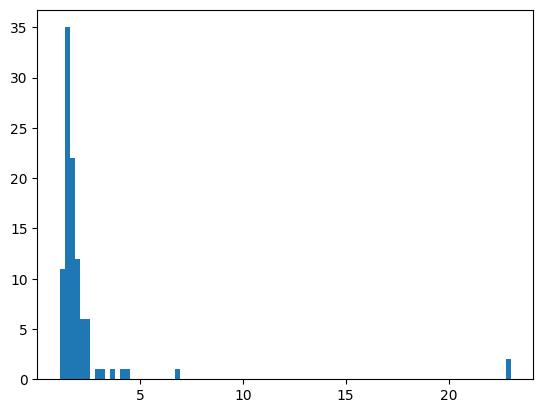

In [13]:
np.random.seed(1)
final_sizes = np.random.normal(0.65, 0.2,100)
# truncating final sizes (because they must be between 0 and 1)
# note this isn't strictly necessary, but my_R0 will return NAs
# wherever final_sizes <= 0 or final_sizes >= 1
# truncation will add weird bimodial peak
final_sizes = np.where(final_sizes >= 1, 1 - 1e-10, final_sizes)
final_sizes = np.where(final_sizes <= 0, 1e-10, final_sizes)

# plug values into my_R0
R0_values= np.zeros(100)
R0_values = calc_R0(final_sizes)

# create histogram of R0 values
# hist(R0_values, xlab="R0", main="Histogram of R0", breaks=seq(0, ceiling(max(R0_values)), 0.33))
plt.hist(R0_values,bins=90)

Next, we will estimate the final size of an epidemic for a given value of $R_0$.

To do this, we need to solve the equation above for r(∞) using an iterative method. Writing an objective function that takes an value of r(∞) and $R_0$ as inputs and returns the absolute difference between the right and left hand sides of the equation above. We will want to minimize this value (i.e. the smallest difference between the right side and left sides of the equation). We will use values for r_inf of 0.2, 0.4, 0.6, with an $R_0$ of 1.1.



In [14]:
def objective_function(r_inf, R0):
  right_side = 1 - math.exp(-R0*r_inf)
  left_side = r_inf
  return (abs(right_side - left_side))

r_inf_test_1 = 0.2
r_inf_test_2 = 0.4
r_inf_test_3 = 0.6

fixed_R0 = 1.1

print("Difference for Rinf = ",r_inf_test_1," is = \t",objective_function(r_inf_test_1, fixed_R0))
print("Difference for Rinf = ",r_inf_test_2," is = \t",objective_function(r_inf_test_2, fixed_R0))
print("Difference for Rinf = ",r_inf_test_3," is = \t",objective_function(r_inf_test_3, fixed_R0))


Difference for Rinf =  0.2  is = 	 0.002518797962478503
Difference for Rinf =  0.4  is = 	 0.04403642108314132
Difference for Rinf =  0.6  is = 	 0.11685133449169915


Solving for r(∞) when $R_0=1.1$. To calculate this, we can use a function to find the optimized value.

In [15]:
fixed_R0 = 1.1
obj_f_partial = partial(objective_function, R0=fixed_R0)
res = minimize_scalar(obj_f_partial, bounds=(0, 1),method="bounded")

print(res,"\n")
print("minima : %.7f" %res.x)


 message: Solution found.
 success: True
  status: 0
     fun: 1.2299891288813924e-07
       x: 0.1761328316000776
     nit: 18
    nfev: 18 

minima : 0.1761328


The estimated R0 for measles follows a normal distribution with a mean of 15, standard deviation of 4. We will estimate 1000 final sizes of the outbreak given this distribution of $R_0$ values.

14.466045322535757 14.172954663766522


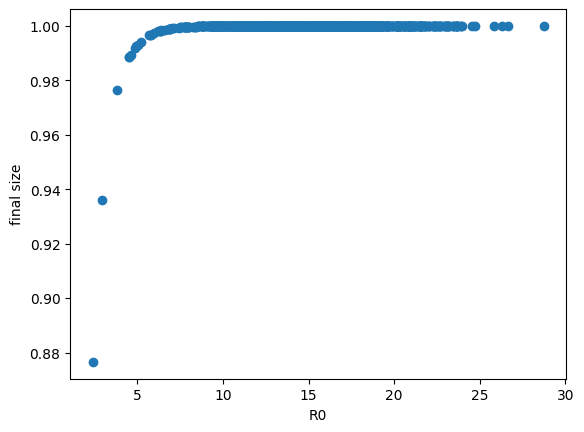

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1., 997.]),
 array([0.87655382, 0.88889784, 0.90124186, 0.91358589, 0.92592991,
        0.93827393, 0.95061795, 0.96296197, 0.975306  , 0.98765002,
        0.99999404]),
 <BarContainer object of 10 artists>)

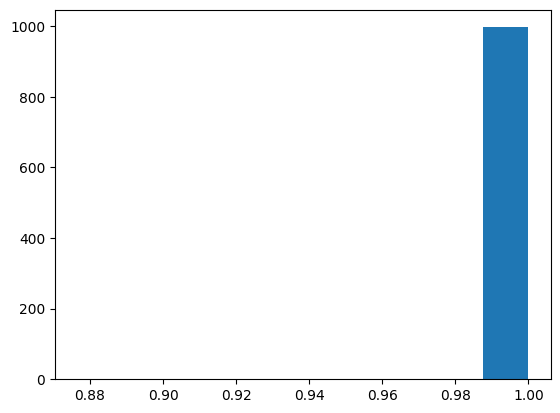

In [17]:
nSamp = 1000

# creating numpy array of R0 values
R0_values = np.random.normal(15, 4, nSamp)
# again, truncating to remove values <0 (highly unlikely to occur)
R0_values = np.where(R0_values <= 0, 1e-10, R0_values)

# calculating final sizes for each R0
# creating a for loop to optimize for each value + pull out minimum
out = np.zeros(nSamp)
for i in range(0,nSamp):
  obj_f_partial = partial(objective_function, R0=R0_values[i])
  tmp = minimize_scalar(obj_f_partial, bounds=(0, 1),method="bounded")
  out[i] = tmp.x

print(R0_values[0],R0_values[nSamp-1])
# plotting R0 vs final size
plt.scatter(R0_values,out)
plt.xlabel("R0")
plt.ylabel("final size")
plt.show()

# histogram of final sizes
plt.hist(out)

## Numerically solving SIR models

We will write code to numerically integrate SIR models. Creating an SIR function, that returns dS, dI and dR for a given set of beta, gamma, and population size inputs (using a vector 'y' that has three slots representing the starting sizes of the S, I and R populations).

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # has lsoda function like R deSolve

def sir_function(t, y, beta, gamma):
  S = y[0]
  I = y[1]
  R = y[2]
# calculate compartments
  dS = -beta*S*I
  dI = beta*S*I - gamma*I
  dR = gamma*I

  return([dS,dI,dR])

def run_sir_model(beta,gamma,initial_state, max_time, freq_dependent):

  # if freq.dependent = true then beta_div = sum of initial states else = 1
  if freq_dependent == True:
    beta_divisor = initial_state[0] + initial_state[1] + initial_state[2]
  else:
    beta_divisor = 1

  beta = beta/beta_divisor
  times = np.linspace(0, max_time, max_time+1)
  sir_output = solve_ivp(sir_function, [times[0],times[-1]],initial_state,args = (beta,gamma), method = 'LSODA')

  return(sir_output)

def sir_plot(soln):
  # plot the SIR model solution...
  # total population size (S+R+I)
  N = soln.y[0] + soln.y[1] + soln.y[2]
  plt.plot(soln.t, soln.y[0], "blue", label='Susceptible')
  plt.plot(soln.t, soln.y[1], "red", label='Infectious')
  plt.plot(soln.t, soln.y[2], "orange", label='Recoverd')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel("Proportion")
  plt.grid(True)

def sir_comp_plot(soln1,soln2):
  # plot the SIR model solution...
  # total population size (S+R+I)
  N = soln1.y[0] + soln1.y[1] + soln1.y[2]
  # Plot first solution
  plt.plot(soln1.t, soln1.y[0], "blue", label='Susceptible')
  plt.plot(soln1.t, soln1.y[1], "red", label='Infectious')
  plt.plot(soln1.t, soln1.y[2], "orange", label='Recoverd')
  # plot second solution for comparison
  plt.plot(soln2.t, soln2.y[0], "blue", label='Susceptible')
  plt.plot(soln2.t, soln2.y[1], "red", label='Infectious')
  plt.plot(soln2.t, soln2.y[2], "orange", label='Recoverd')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel("Proportion")
  plt.grid(True)


We can then use this code to numerically integrate an SIR model with fixed parameters. We will use the code above to identify $R_0$ in this model using frequency dependent transmission. Using an initial state of S=500000, I = 1, R = 10000 a gamma of 0.05 and a beta of 1.


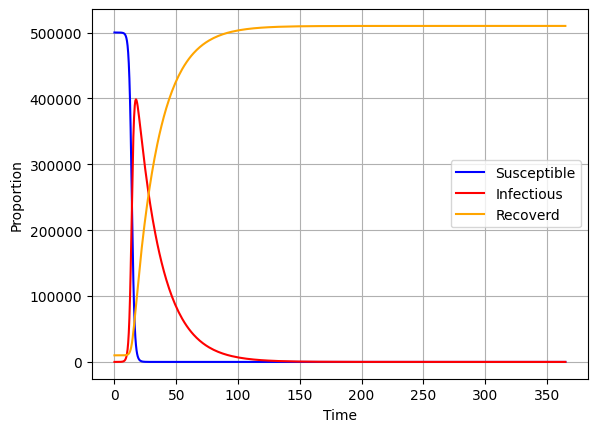

In [20]:
test_output = run_sir_model(beta = 1, gamma = 0.05,  initial_state = [500000, 1, 10000], max_time = 365, freq_dependent = True)
sir_plot(test_output)

Two more simulations – one with a higher beta of 2, and one with a lower beta of 0.5. All other parameters and states are the same as above.

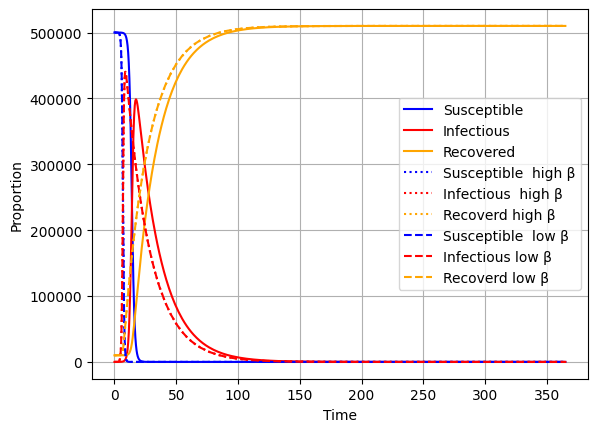

In [21]:
# high beta SIR
test_output_high_beta = run_sir_model(beta = 2, gamma = 0.05,  initial_state = [500000, 1, 10000], max_time = 365, freq_dependent = True)

# low beta SIR
test_output_low_beta = run_sir_model(beta = 0.5, gamma = 0.05,  initial_state = [500000, 1, 10000], max_time = 365, freq_dependent = True)

#Plot the three sets of curves
soln1 = test_output
soln2 = test_output_high_beta
soln3 = test_output_low_beta

# Plot first solution
plt.plot(soln1.t, soln1.y[0], "blue", label= 'Susceptible')
plt.plot(soln1.t, soln1.y[1], "red", label= 'Infectious')
plt.plot(soln1.t, soln1.y[2], "orange", label= 'Recovered')

# plot second solution for comparison
hb = " high \u03B2"
plt.plot(soln2.t, soln2.y[0], "blue", ls = ":", label='Susceptible ' + hb)
plt.plot(soln2.t, soln2.y[1], "red", ls = ":", label='Infectious ' + hb)
plt.plot(soln2.t, soln2.y[2], "orange", ls = ":", label='Recoverd' + hb)

# plot third solution for comparison
lb = " low \u03B2"
plt.plot(soln2.t, soln2.y[0], "blue", ls = "--", label='Susceptible ' + lb )
plt.plot(soln2.t, soln2.y[1], "red", ls = "--", label='Infectious' + lb)
plt.plot(soln2.t, soln2.y[2], "orange", ls = "--", label='Recoverd' + lb)

plt.legend()
plt.xlabel('Time')
plt.ylabel("Proportion")
plt.grid(True)


Suppose there is a pathogen whose transmission can be approximated with an SIR model where beta = 1, gamma = 1/10. There is a new intervention in place that would reduce the transmissibility of the pathogen by half. Assuming frequency dependent transmission and the same initial conditions as above, we will run two simulations - one with the intervention and one without.


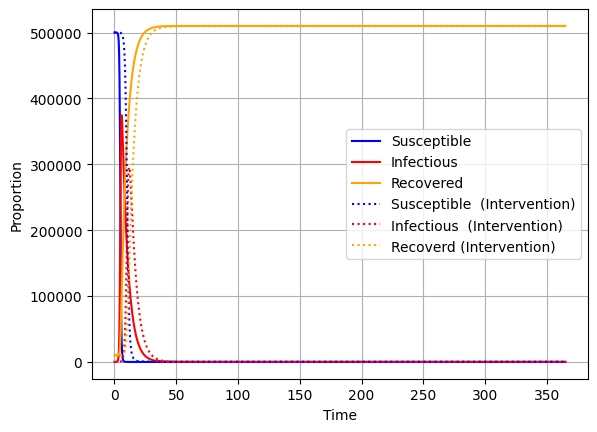

In [22]:
# no intervention model
out_no_int = run_sir_model(beta = 3, gamma = 0.2,  initial_state = [500000, 1, 10000], max_time = 365, freq_dependent = True)

# intervention
out_int = run_sir_model(beta = 1.5, gamma = 0.2,  initial_state = [500000, 1, 10000], max_time = 365, freq_dependent = True)

#Plot the two sets of curves
soln1 = out_no_int
soln2 = out_int

# Plot first solution
plt.plot(soln1.t, soln1.y[0], "blue", label= 'Susceptible')
plt.plot(soln1.t, soln1.y[1], "red", label= 'Infectious')
plt.plot(soln1.t, soln1.y[2], "orange", label= 'Recovered')

# plot second solution for comparison
wi = " (Intervention)"
plt.plot(soln2.t, soln2.y[0], "blue", ls = ":", label='Susceptible ' + wi)
plt.plot(soln2.t, soln2.y[1], "red", ls = ":", label='Infectious ' + wi)
plt.plot(soln2.t, soln2.y[2], "orange", ls = ":", label='Recoverd' + wi)

plt.legend()
plt.xlabel('Time')
plt.ylabel("Proportion")
plt.grid(True)
# -----------------------

We will now consider vaccination – where the vaccine results in perfect protection from infection. Running the model with a 10% vaccination rate.

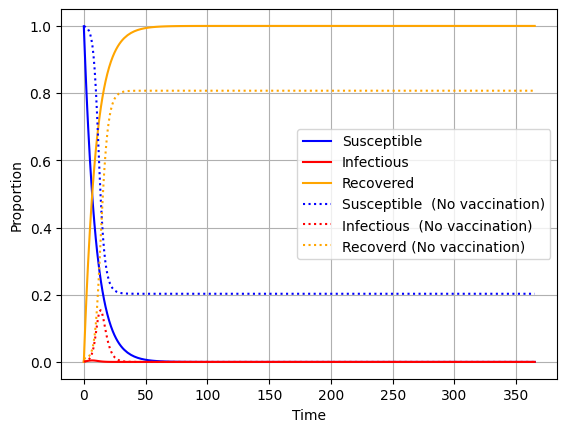

In [23]:
# Python version
# effect of vaccination compared to no vaccination

def sir_w_vacc_function(t, y, beta, gamma, v):
    # if freq.dependent = true then beta_div = sum of initial states else = 1

  S = y[0]
  I = y[1]
  R = y[2]
# calculate compartments
  dS = -beta*S*I-v*S
  dI = beta*S*I - gamma*I
  dR = gamma*I+v*S

  return([dS,dI,dR])

def run_sir_w_vacc_model(beta, gamma, v, initial_state, max_time, freq_dependent):
  # if freq.dependent = true then beta_div = sum of initial states else = 1
  if freq_dependent == True:
    beta_divisor = initial_state[0] + initial_state[1] + initial_state[2]
  else:
    beta_divisor = 1

  beta = beta/beta_divisor
  times = np.linspace(0, max_time, max_time+1)
  y0 = []
  # solve_ivp(func, t_span, y0, ) - y0 is initial state
  sir_output = solve_ivp(sir_w_vacc_function, [times[0],times[-1]],initial_state,args = (beta,gamma,v), method = 'LSODA')

  return(sir_output)

out_vacc = run_sir_w_vacc_model(beta = 1, gamma = 0.5, v = 0.1, initial_state = [0.999,0.001,0.0], max_time = 365, freq_dependent = False)
out_novacc = run_sir_model(beta = 1, gamma = 0.5, initial_state = [0.999,0.001, 0.01], max_time = 365, freq_dependent = False)

#Plot the two sets of curves
soln1 = out_vacc
soln2 = out_novacc

# Plot first solution
plt.plot(soln1.t, soln1.y[0], "blue", label= 'Susceptible')
plt.plot(soln1.t, soln1.y[1], "red", label= 'Infectious')
plt.plot(soln1.t, soln1.y[2], "orange", label= 'Recovered')

# plot second solution for comparison
wi = " (No vaccination)"
plt.plot(soln2.t, soln2.y[0], "blue", ls = ":", label='Susceptible ' + wi)
plt.plot(soln2.t, soln2.y[1], "red", ls = ":", label='Infectious ' + wi)
plt.plot(soln2.t, soln2.y[2], "orange", ls = ":", label='Recoverd' + wi)

plt.legend()
plt.xlabel('Time')
plt.ylabel("Proportion")
plt.grid(True)
#-----------------------